# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [41]:
import json

### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | christchurch
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | khairpur tamewah
Processing Record 6 of Set 1 | kununurra
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | hammerfest
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 12 of Set 1 | hawaiian paradise park
Processing Record 13 of Set 1 | voi
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 16 of Set 1 | saipan
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | grand baie
Processing Record 19 of Set 1 | dunedin
Processing Record 20 of Set 1 

Processing Record 40 of Set 4 | belvedere
Processing Record 41 of Set 4 | kerikeri
Processing Record 42 of Set 4 | vuktyl
Processing Record 43 of Set 4 | akureyri
Processing Record 44 of Set 4 | kiunga
Processing Record 45 of Set 4 | usinsk
Processing Record 46 of Set 4 | kenai
Processing Record 47 of Set 4 | pindi gheb
Processing Record 48 of Set 4 | talcahuano
Processing Record 49 of Set 4 | kruisfontein
Processing Record 0 of Set 5 | vila franca do campo
Processing Record 1 of Set 5 | happy valley-goose bay
Processing Record 2 of Set 5 | concepcion del oro
Processing Record 3 of Set 5 | sanming
Processing Record 4 of Set 5 | kolonia town
Processing Record 5 of Set 5 | nar'yan-mar
Processing Record 6 of Set 5 | port alfred
Processing Record 7 of Set 5 | piti village
Processing Record 8 of Set 5 | plouguerneau
Processing Record 9 of Set 5 | betma
Processing Record 10 of Set 5 | cruzeiro do sul
Processing Record 11 of Set 5 | tomatlan
Processing Record 12 of Set 5 | kapuskasing
Process

Processing Record 32 of Set 8 | port lincoln
Processing Record 33 of Set 8 | naregal
Processing Record 34 of Set 8 | tura
Processing Record 35 of Set 8 | broken hill
Processing Record 36 of Set 8 | santa ana
Processing Record 37 of Set 8 | palikir - national government center
Processing Record 38 of Set 8 | mukharram al fawqani
Processing Record 39 of Set 8 | gamba
Processing Record 40 of Set 8 | noosa heads
Processing Record 41 of Set 8 | praia da vitoria
Processing Record 42 of Set 8 | ulsteinvik
Processing Record 43 of Set 8 | coquimbo
Processing Record 44 of Set 8 | lorengau
Processing Record 45 of Set 8 | maintirano
Processing Record 46 of Set 8 | qamdo
Processing Record 47 of Set 8 | ciudad bolivar
Processing Record 48 of Set 8 | bonthe
Processing Record 49 of Set 8 | ramadi
Processing Record 0 of Set 9 | saint-hippolyte
Processing Record 1 of Set 9 | saint-philippe
Processing Record 2 of Set 9 | el granada
Processing Record 3 of Set 9 | san jose del guaviare
Processing Record 4 

Processing Record 21 of Set 12 | truro
Processing Record 22 of Set 12 | wellington
Processing Record 23 of Set 12 | nizhnyaya salda
Processing Record 24 of Set 12 | nova vicosa
Processing Record 25 of Set 12 | krasnogorskiy
Processing Record 26 of Set 12 | yasnyy
Processing Record 27 of Set 12 | cidreira
Processing Record 28 of Set 12 | constantia
Processing Record 29 of Set 12 | trujillo
Processing Record 30 of Set 12 | trinidad
Processing Record 31 of Set 12 | deqen
Processing Record 32 of Set 12 | uglegorsk
Processing Record 33 of Set 12 | vorkuta
Processing Record 34 of Set 12 | sainte catherine de la jacques cartier
Processing Record 35 of Set 12 | north bondi
Processing Record 36 of Set 12 | pochinok
Processing Record 37 of Set 12 | gaspe
Processing Record 38 of Set 12 | aoulef
-----------------------------
Data Retrieval Complete      
-----------------------------


In [44]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [50]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [51]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,christchurch,-43.5333,172.6333,16.34,55,75,3.09,NZ,1696729838
1,adamstown,-25.0660,-130.1015,19.86,77,13,6.22,PN,1696729639
2,port-aux-francais,-49.3500,70.2167,3.83,86,99,13.12,TF,1696729642
3,khairpur tamewah,29.5811,72.2364,29.20,47,0,4.24,PK,1696729954
4,kununurra,-15.7667,128.7333,32.99,13,8,7.20,AU,1696729954


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

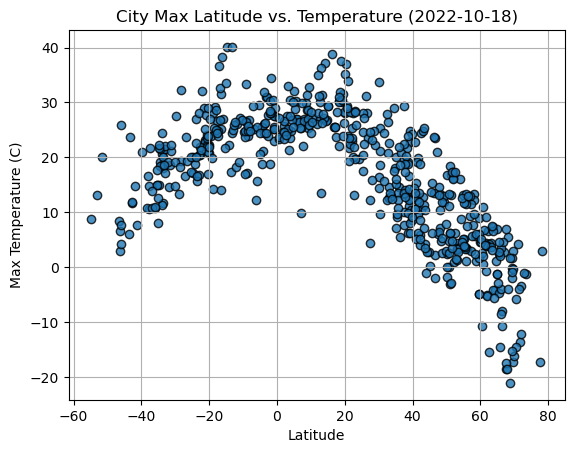

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

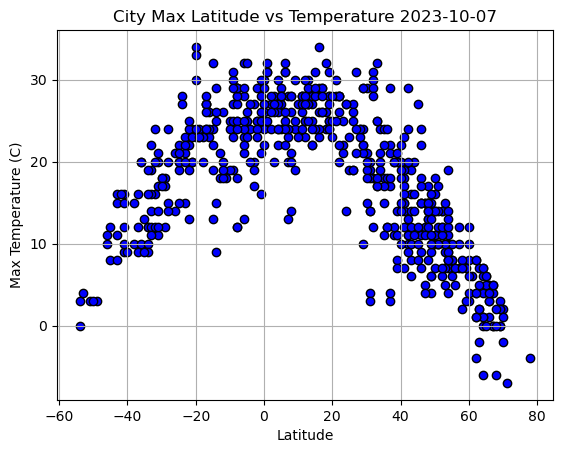

In [82]:
# Get today's date
today_date = time.strftime("%Y-%m-%d")

x = [int(city["Lat"]) for city in city_data]
y = [int(city["Max Temp"]) for city in city_data]
plt.scatter(x,y,marker="o", facecolor="b", edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Max Latitude vs Temperature {today_date}")

# Enable the grid
plt.grid(True)

#plt.ylim(-15,42)
#plt.xlim(-62,85)
plt.show()

#### Latitude Vs. Humidity

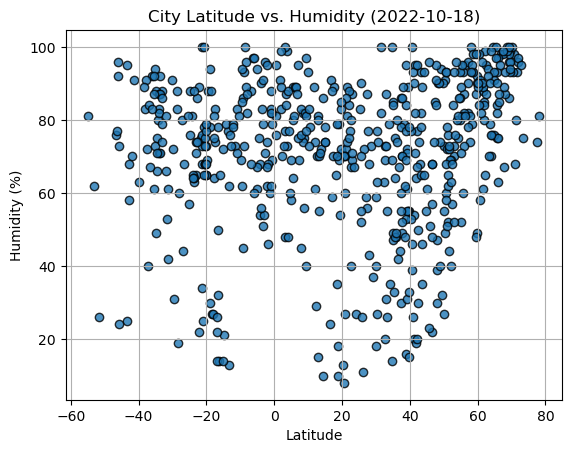

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

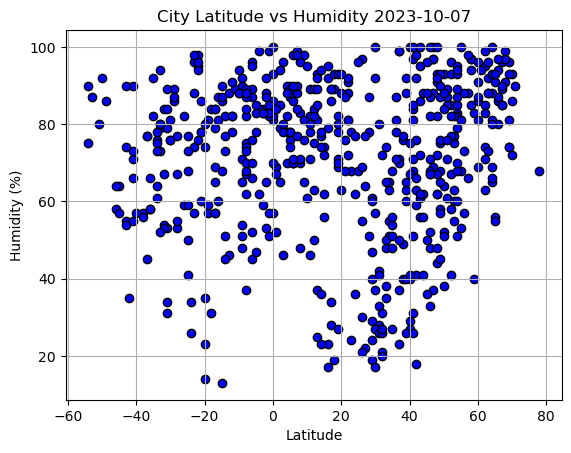

In [86]:
today_date = time.strftime("%Y-%m-%d")

x = [int(city["Lat"]) for city in city_data]
y = [int(city["Humidity"]) for city in city_data]
plt.scatter(x,y,marker="o", facecolor="b", edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity {today_date}")

# Enable the grid
plt.grid(True)

#### Latitude Vs. Cloudiness

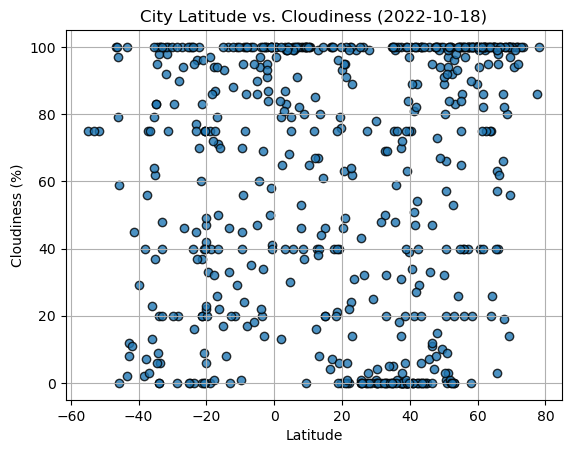

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

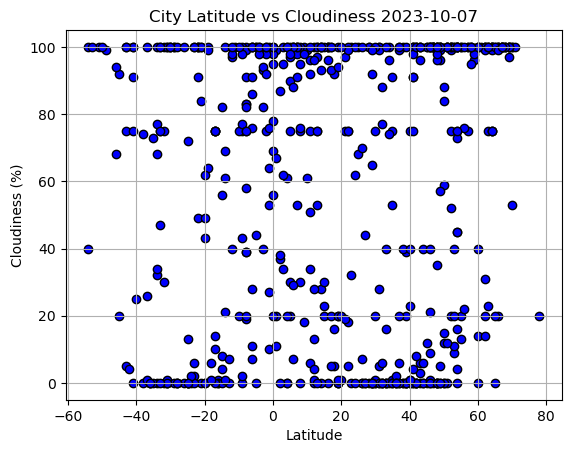

In [87]:
today_date = time.strftime("%Y-%m-%d")

x = [int(city["Lat"]) for city in city_data]
y = [int(city["Cloudiness"]) for city in city_data]
plt.scatter(x,y,marker="o", facecolor="b", edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness {today_date}")

# Enable the grid
plt.grid(True)

#### Latitude vs. Wind Speed Plot

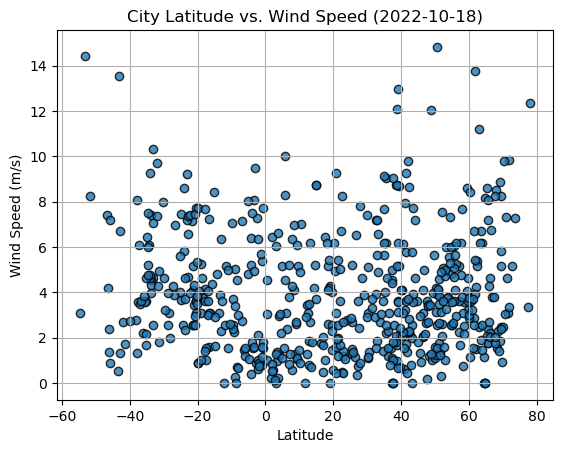

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

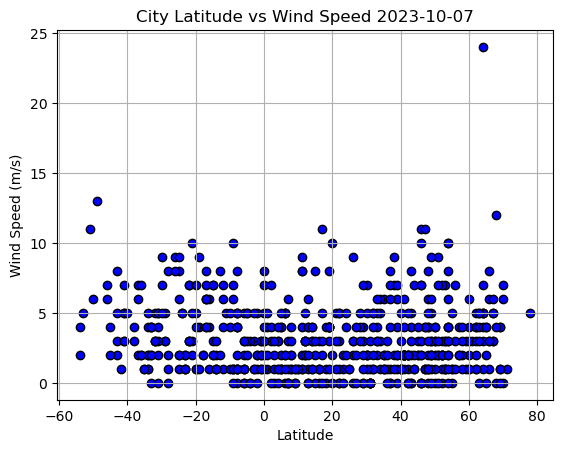

In [88]:
today_date = time.strftime("%Y-%m-%d")

x = [int(city["Lat"]) for city in city_data]
y = [int(city["Wind Speed"]) for city in city_data]
plt.scatter(x,y,marker="o", facecolor="b", edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed {today_date}")

# Enable the grid
plt.grid(True)

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [153]:
from scipy import stats

def Create_Linear_regression_plot(x, y, x_label, y_label, i, j):
    x = np.array(x)
    y = np.array(y)
    
    # Perform linear regression using scipy's linregress
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    
    # Calculate the regression line
    regress_values = x * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))    
    
    # Create a scatter plot of the data points
    plt.scatter(x, y, label="Data Points", color="blue")
    
    # Plot the regression line
    plt.plot(x, regress_values, label="Linear Regression", color="red")
    
    # Customize plot labels and title
    plt.xlabel(x_label if x_label else "X-axis")
    plt.ylabel(y_label if y_label else "Y-axis")
    
    # Find the data point with the highest x and y values
    #max_x = x[np.argmax(x)]
    #max_y = y[np.argmax(y)]
    
    # Adjust annotation position relative to the data point
   # x_offset = 0.2  # Adjust as needed
    #y_offset = 0.2  # Adjust as needed
    
    
    plt.annotate(line_eq, (i, j), fontsize=15, color="r")
    print(f"r-value is: {rvalue**2}")
    plt.show()
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [121]:
north_data=[]

for city in city_data:
    city_lat = float(city["Lat"])
    if city_lat >= 0:
        north_data.append({
            "City": city["City"], 
            "Lat": float(city["Lat"]), 
            "Lng": float(city["Lng"]), 
            "Max Temp": float(city["Max Temp"]),
            "Humidity": float(city["Humidity"]),
            "Cloudiness": float(city["Cloudiness"]),
            "Wind Speed": float(city["Wind Speed"]),
            "Country": city["Country"],
            "Date": city["Date"]
        })
# Create a DataFrame
north_df=pd.DataFrame(north_data)
# Filter the DataFrame for the Northern Hemisphere
north_hemi_df = north_df[north_df["Lat"] >= 0]
# Display sample data for the Northern Hemisphere
north_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khairpur tamewah,29.5811,72.2364,29.20,47.0,0.0,4.24,PK,1696729954
1,hammerfest,70.6634,23.6821,2.25,93.0,100.0,0.51,NO,1696729737
2,hawaiian paradise park,19.5933,-154.9731,28.73,71.0,0.0,4.63,US,1696729659
3,longyearbyen,78.2186,15.6401,-4.09,68.0,20.0,5.14,SJ,1696729649
4,saipan,15.1355,145.7010,31.39,74.0,20.0,8.23,MP,1696729655


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


In [119]:
south_data=[]

for city in city_data:
    city_lat = float(city["Lat"])
    if city_lat < 0:
        south_data.append({
            "City": city["City"], 
            "Lat": city["Lat"], 
            "Lng": float(city["Lng"]), 
            "Max Temp": float(city["Max Temp"]),
            "Humidity": float(city["Humidity"]),
            "Cloudiness": float(city["Cloudiness"]),
            "Wind Speed": float(city["Wind Speed"]),
            "Country": city["Country"],
            "Date": city["Date"]
        })
# Create a DataFrame
south_df=pd.DataFrame(south_data)
# Filter the DataFrame for the Northern Hemisphere
south_hemi_df = south_df[south_df["Lat"] < 0]
# Display sample data for the Northern Hemisphere
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,christchurch,-43.5333,172.6333,16.34,55.0,75.0,3.09,NZ,1696729838
1,adamstown,-25.0660,-130.1015,19.86,77.0,13.0,6.22,PN,1696729639
2,port-aux-francais,-49.3500,70.2167,3.83,86.0,99.0,13.12,TF,1696729642
3,kununurra,-15.7667,128.7333,32.99,13.0,8.0,7.20,AU,1696729954
4,puerto natales,-51.7236,-72.4875,3.27,80.0,100.0,11.74,CL,1696729637


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


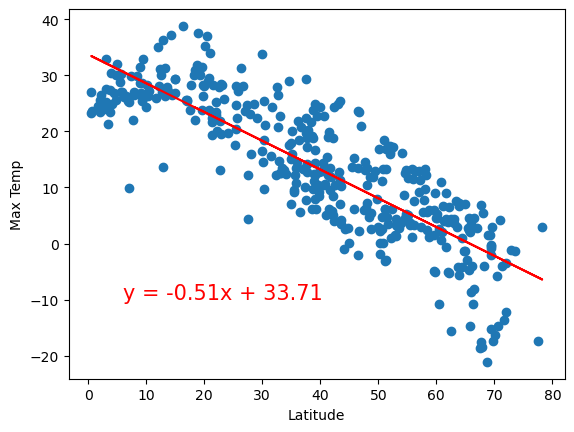

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

r-value is: 0.7353052131902265


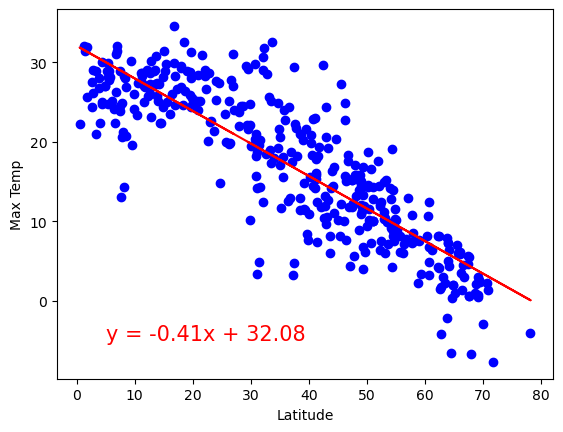

In [154]:
x = [lat["Lat"] for lat in north_data]
y = [temp["Max Temp"] for temp in north_data]
x_lable ="Latitude"
y_lable="Max Temp"
i = 5
j = -5
Create_Linear_regression_plot(x,y, x_lable, y_lable, i, j)


The r-value is: 0.4121057168607245


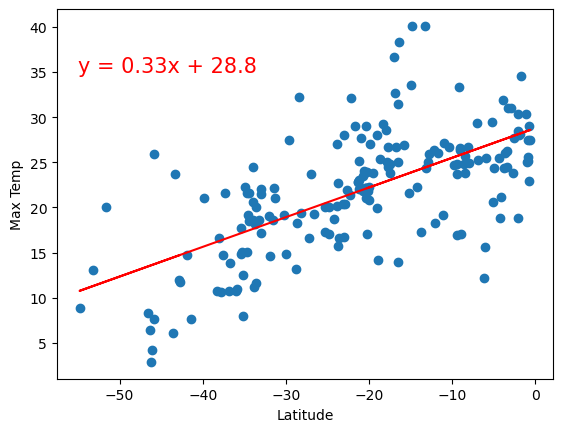

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

r-value is: 0.5488638315401303


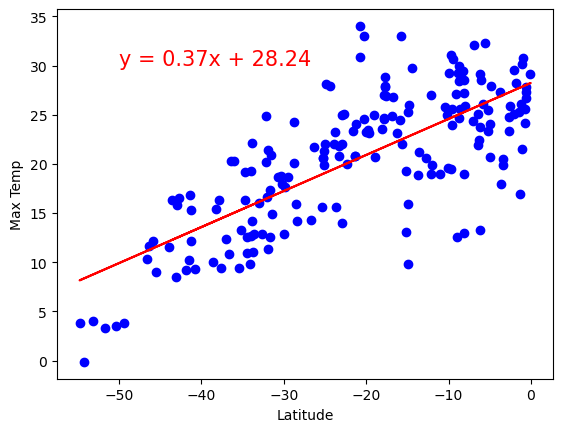

In [156]:
x = [lat["Lat"] for lat in south_data]
y = [temp["Max Temp"] for temp in south_data]
x_lable ="Latitude"
y_lable="Max Temp"
i = -50
j = 30
Create_Linear_regression_plot(x,y, x_lable, y_lable, i, j)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


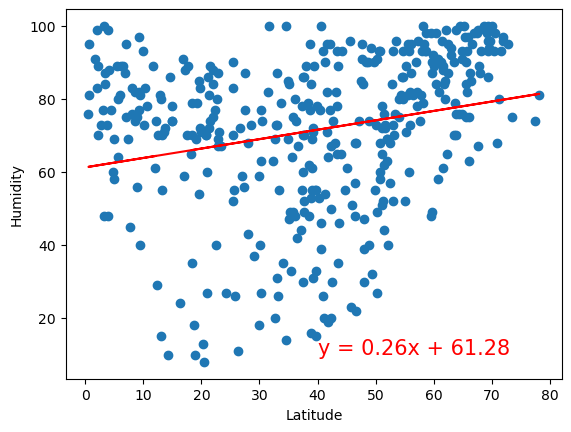

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

r-value is: 0.012071806669491987


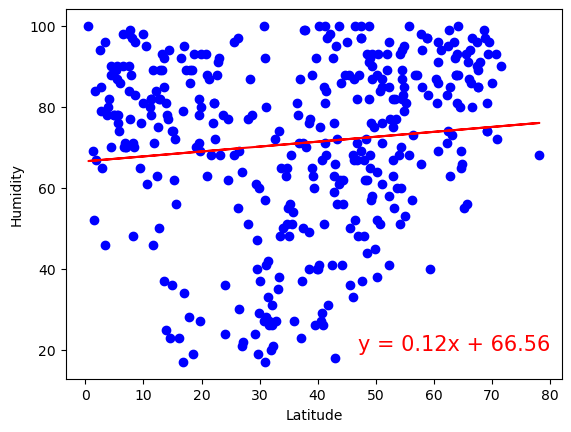

In [162]:
x = [lat["Lat"] for lat in north_data]
y = [humidity["Humidity"] for humidity in north_data]
x_lable ="Latitude"
y_lable="Humidity"
i = 47
j = 20
Create_Linear_regression_plot(x,y, x_lable, y_lable, i, j)

The r-value is: 0.0002808747046324607


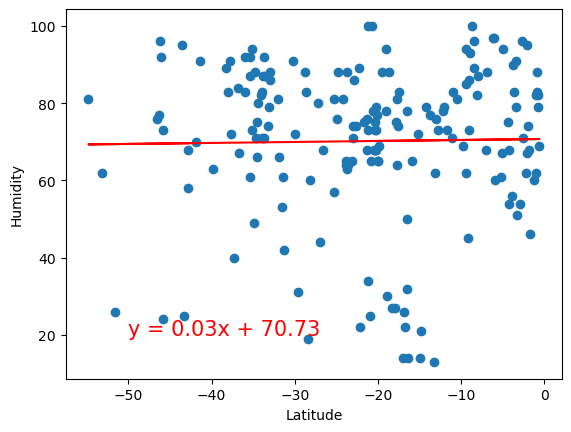

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

r-value is: 0.015659190193757905


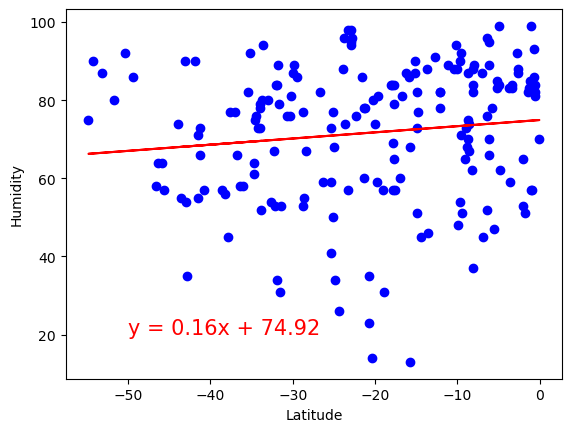

In [163]:
x = [lat["Lat"] for lat in south_data]
y = [humidity["Humidity"] for humidity in south_data]
x_lable ="Latitude"
y_lable="Humidity"
i = -50
j = 20
Create_Linear_regression_plot(x,y, x_lable, y_lable, i, j)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


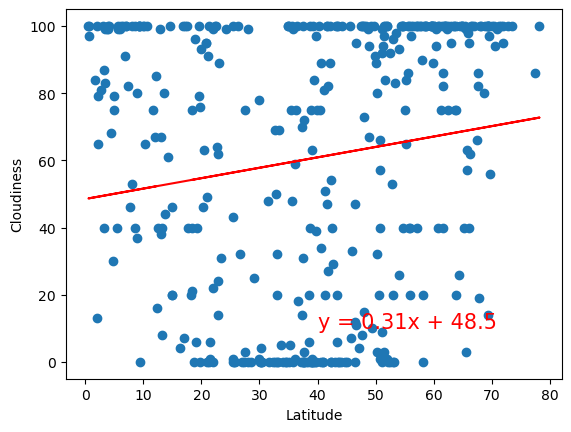

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

r-value is: 0.014099971153520718


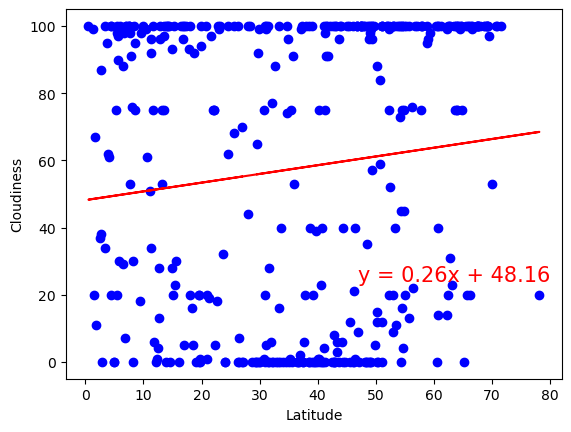

In [166]:
x = [lat["Lat"] for lat in north_data]
y = [cloudiness["Cloudiness"] for cloudiness in north_data]
x_lable ="Latitude"
y_lable="Cloudiness"
i = 47
j = 24
Create_Linear_regression_plot(x,y, x_lable, y_lable, i, j)

The r-value is: 0.02056735429994368


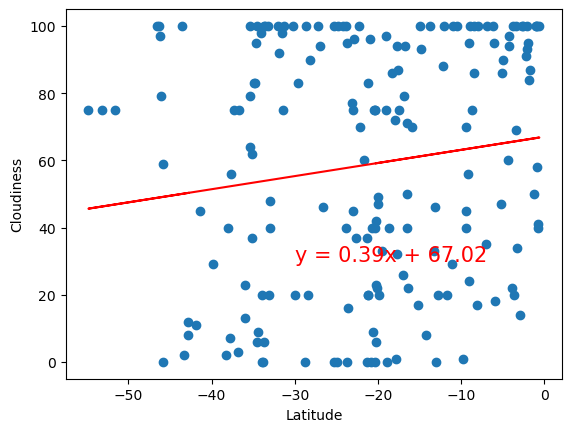

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

r-value is: 0.008402282832920566


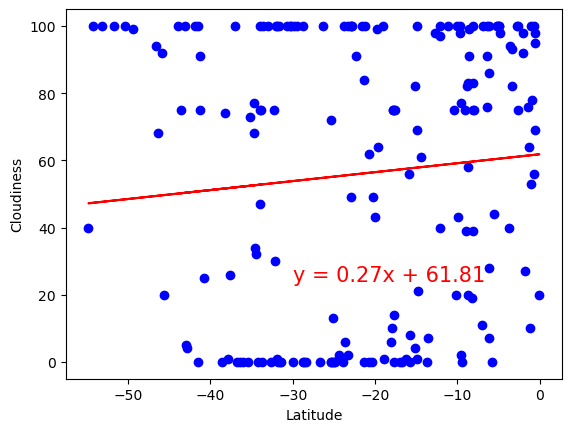

In [167]:
x = [lat["Lat"] for lat in south_data]
y = [cloudiness["Cloudiness"] for cloudiness in south_data]
x_lable ="Latitude"
y_lable="Cloudiness"
i = -30
j = 24
Create_Linear_regression_plot(x,y, x_lable, y_lable, i, j)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


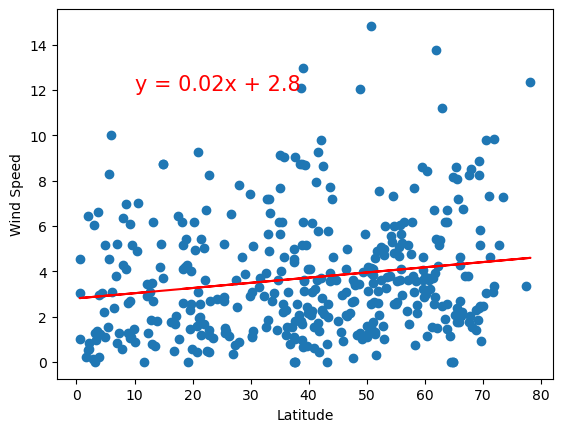

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

r-value is: 0.018339386390969447


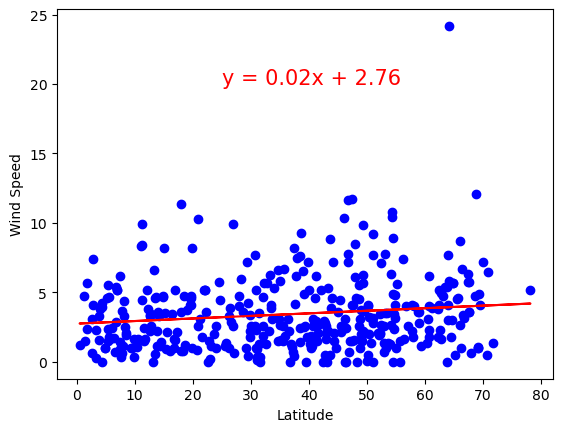

In [171]:
x = [lat["Lat"] for lat in north_data]
y = [wind_Speed["Wind Speed"] for wind_Speed in north_data]
x_lable ="Latitude"
y_lable="Wind Speed"
i = 25
j = 20
Create_Linear_regression_plot(x,y, x_lable, y_lable, i, j)

The r-value is: 0.062239040700515696


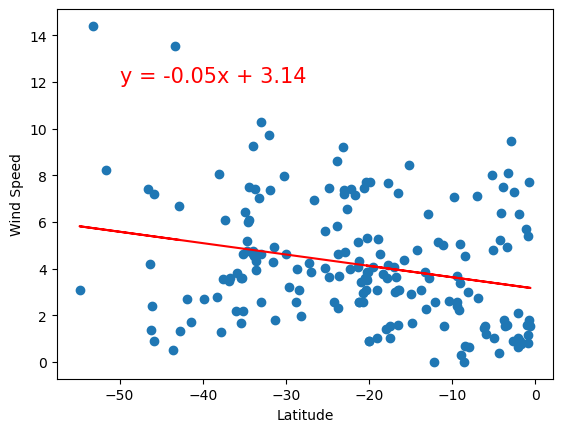

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

r-value is: 0.04404377524950068


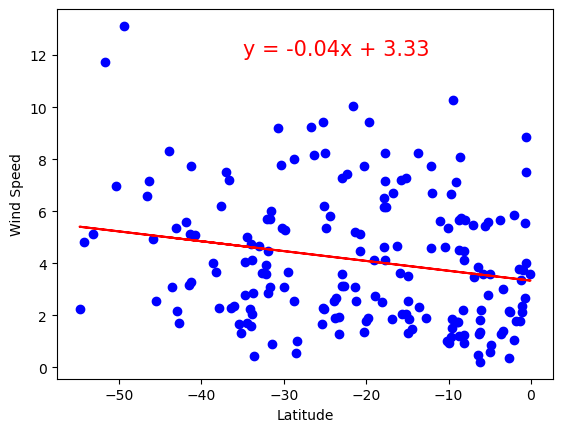

In [174]:
x = [lat["Lat"] for lat in south_data]
y = [wind_Speed["Wind Speed"] for wind_Speed in south_data]
x_lable ="Latitude"
y_lable="Wind Speed"
i = -35
j = 12
Create_Linear_regression_plot(x,y, x_lable, y_lable, i, j)

**Discussion about the linear relationship:** YOUR RESPONSE HERE